# Clustering volatility regimes

In [ ]:
import pandas as pd

# Load the preprocessed dataset
df = pd.read_csv(drive_path + "preprocessed_data.csv")

# Drop the Date column (since clustering only works on numerical data)
df.drop(columns=['Date'], inplace=True, errors='ignore')

# Show dataset structure
print("\n Data Overview:")
print(df.info())
print("\n Sample Data:")
print(df.head())



 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VIX                    1985 non-null   float64
 1   S&P500                 1985 non-null   float64
 2   Historical_Volatility  1985 non-null   float64
 3   Interest_Rate          1985 non-null   float64
 4   Inflation              1985 non-null   float64
 5   GDP_Growth             1985 non-null   float64
 6   Unemployment_Rate      1985 non-null   float64
 7   Money_Supply           1985 non-null   float64
 8   TED_Spread             1985 non-null   float64
dtypes: float64(9)
memory usage: 139.7 KB
None

 Sample Data:
        VIX    S&P500  Historical_Volatility  Interest_Rate  Inflation  \
0 -0.581258 -1.147302              -0.447054      -0.818324  -1.121714   
1 -0.582587 -1.140281              -0.470647      -0.818324  -1.121714   
2 -0.545374 -1.143061

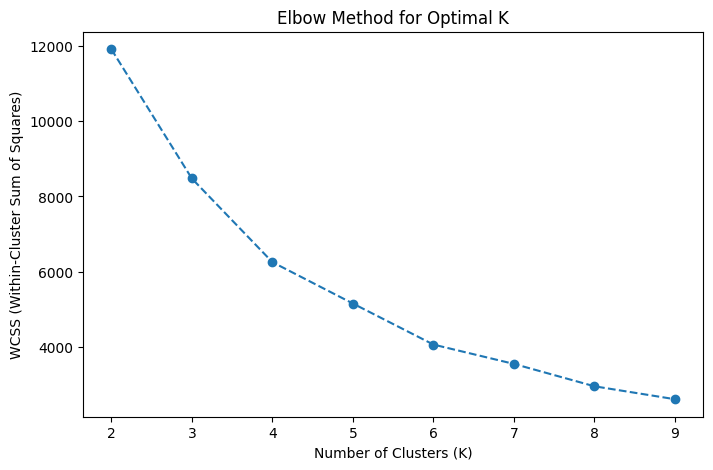

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Determine the optimal number of clusters
wcss = []  # Within-Cluster Sum of Squares
K_range = range(2, 10)  # Testing clusters from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [ ]:
# Choose the optimal number of clusters from the Elbow Method
optimal_k = 4  # Change this based on Elbow Method result

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df)

# Save the dataset with cluster labels
df.to_csv(drive_path + "clustered_data.csv", index=False)

print("Clustering complete! Data saved as 'clustered_data.csv' in Google Drive.")


Clustering complete! Data saved as 'clustered_data.csv' in Google Drive.


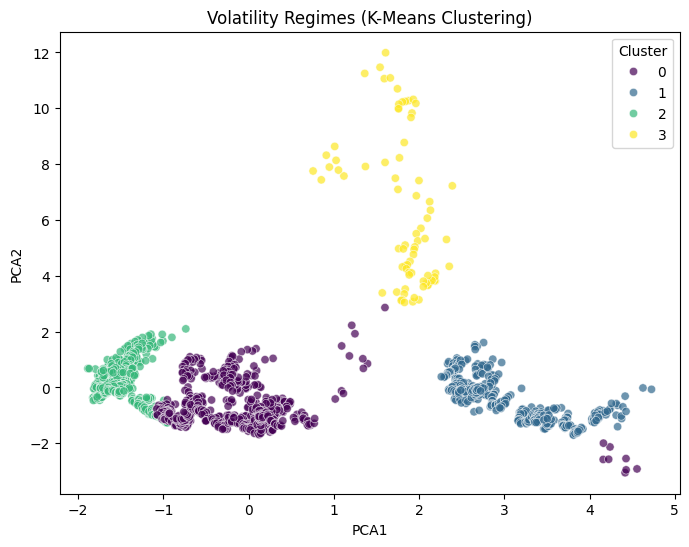

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=["Cluster"]))  # Exclude Cluster column

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = df["Cluster"]

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", palette="viridis", data=df_pca, alpha=0.7)
plt.title("Volatility Regimes (K-Means Clustering)")
plt.show()


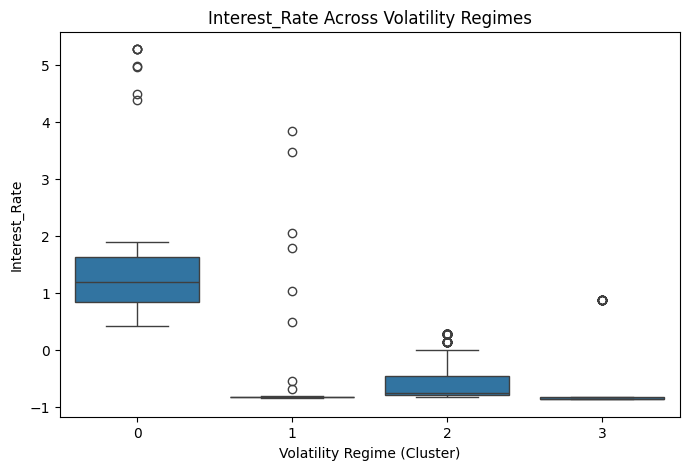

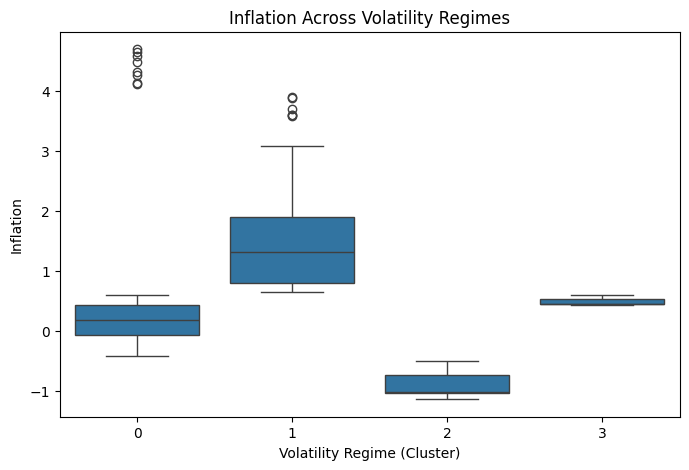

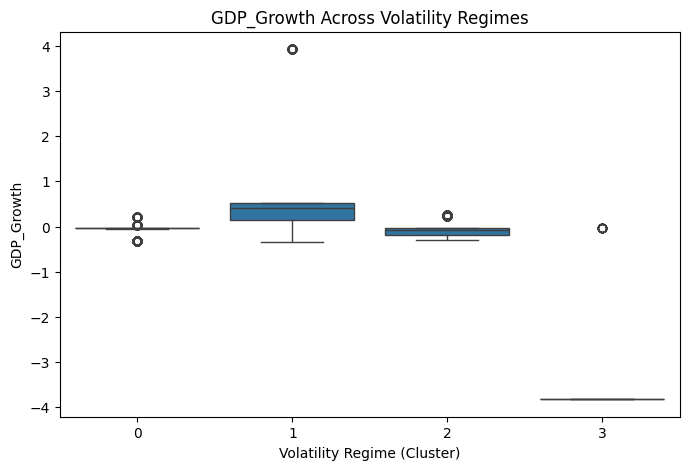

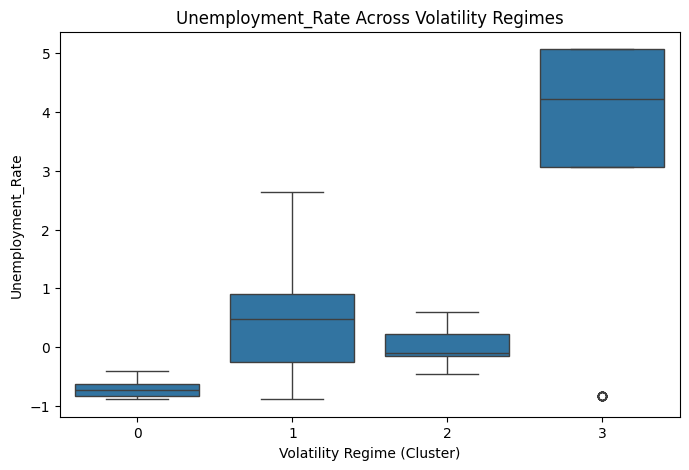

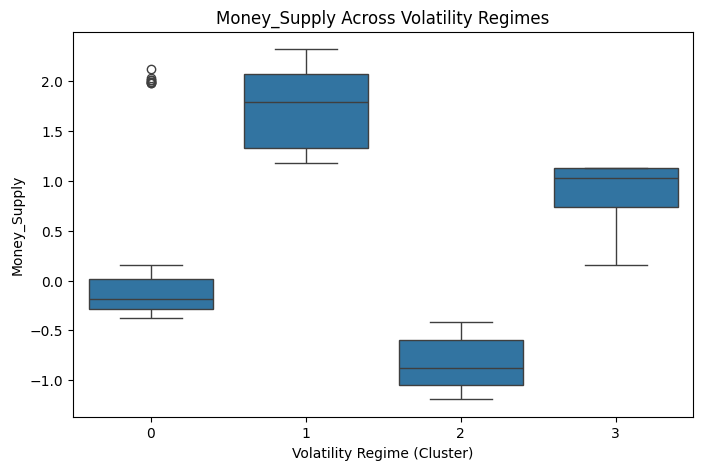

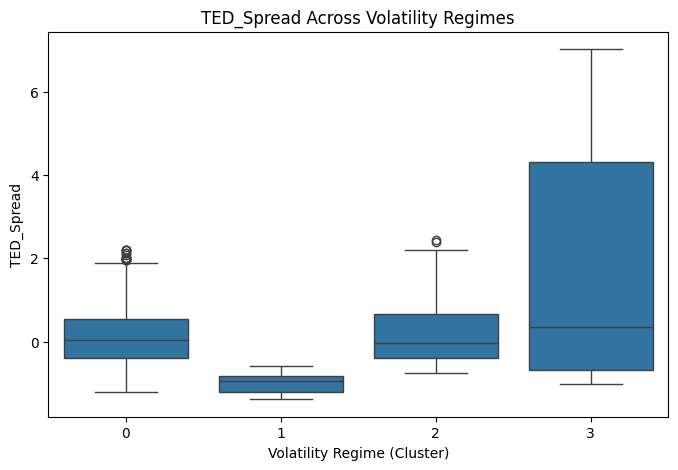

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant macroeconomic factors
macro_factors = ["Interest_Rate", "Inflation", "GDP_Growth", "Unemployment_Rate", "Money_Supply", "TED_Spread"]

# Create boxplots for each macroeconomic factor
for factor in macro_factors:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df["Cluster"], y=df[factor])
    plt.title(f"{factor} Across Volatility Regimes")
    plt.xlabel("Volatility Regime (Cluster)")
    plt.ylabel(factor)
    plt.show()


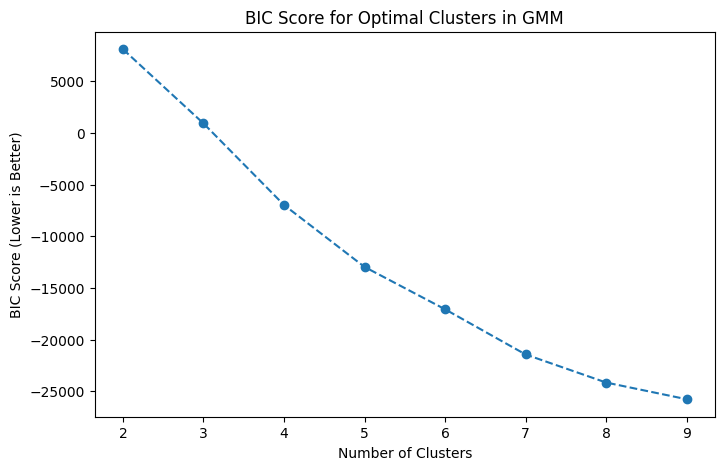

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Try different numbers of clusters and compare BIC scores
bic_scores = []
n_clusters = range(2, 10)  # Test cluster sizes from 2 to 10

for k in n_clusters:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(df.drop(columns=["Cluster"], errors='ignore'))
    bic_scores.append(gmm.bic(df.drop(columns=["Cluster"], errors='ignore')))

# Plot BIC scores
plt.figure(figsize=(8, 5))
plt.plot(n_clusters, bic_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("BIC Score (Lower is Better)")
plt.title("BIC Score for Optimal Clusters in GMM")
plt.show()


In [ ]:
# Choose optimal K from BIC plot (adjust as needed)
optimal_k = 4  # Change based on BIC result

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_k, covariance_type='full', random_state=42)
df["GMM_Cluster"] = gmm.fit_predict(df.drop(columns=["Cluster"], errors='ignore'))

# Save GMM-clustered data
df.to_csv(drive_path + "gmm_clustered_data.csv", index=False)

print("GMM Clustering complete! Data saved as 'gmm_clustered_data.csv' in Google Drive.")


GMM Clustering complete! Data saved as 'gmm_clustered_data.csv' in Google Drive.


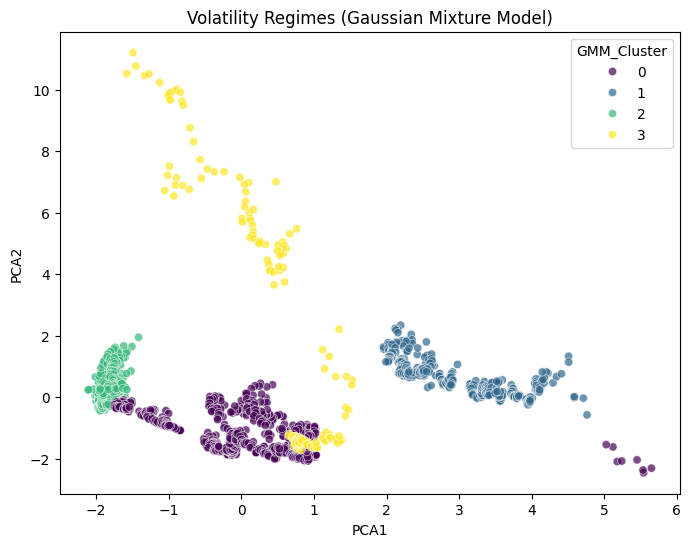

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=["GMM_Cluster"], errors='ignore'))

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=["PCA1", "PCA2"])
df_pca["GMM_Cluster"] = df["GMM_Cluster"]

# Plot GMM clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="GMM_Cluster", palette="viridis", data=df_pca, alpha=0.7)
plt.title("Volatility Regimes (Gaussian Mixture Model)")
plt.show()


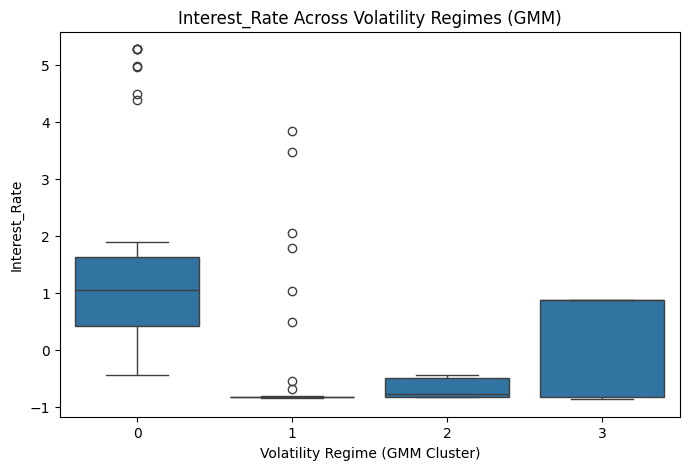

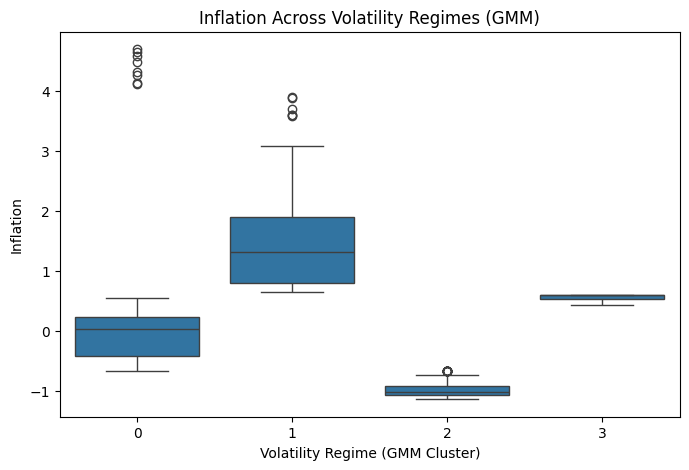

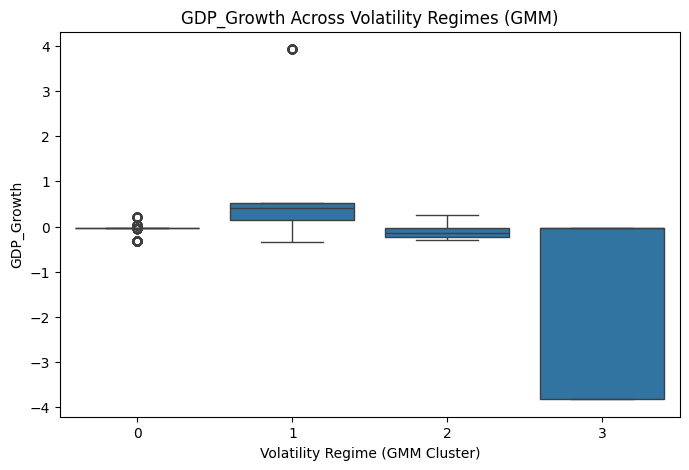

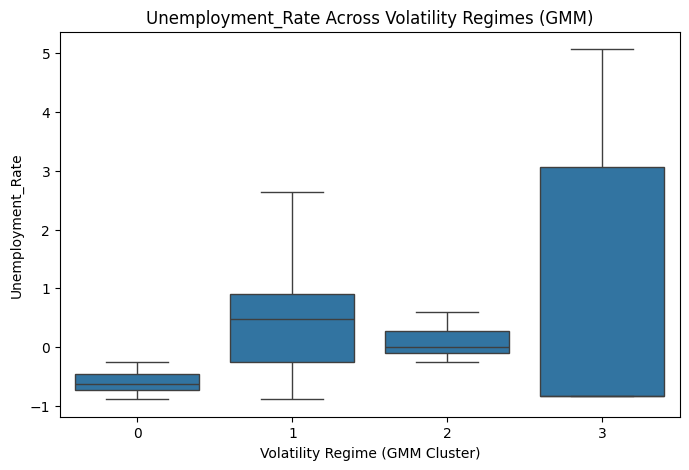

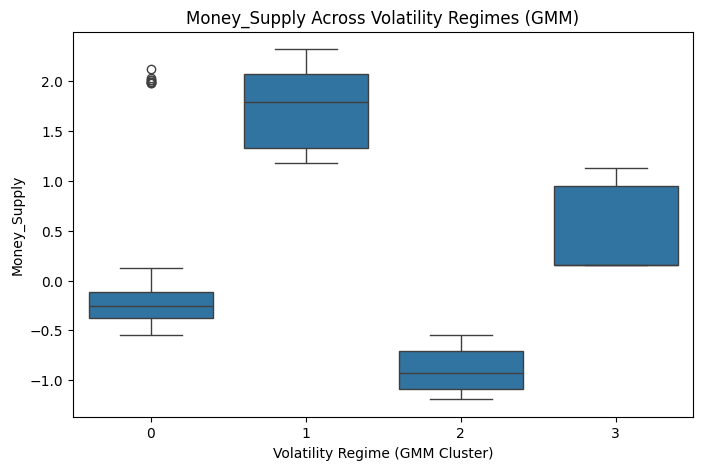

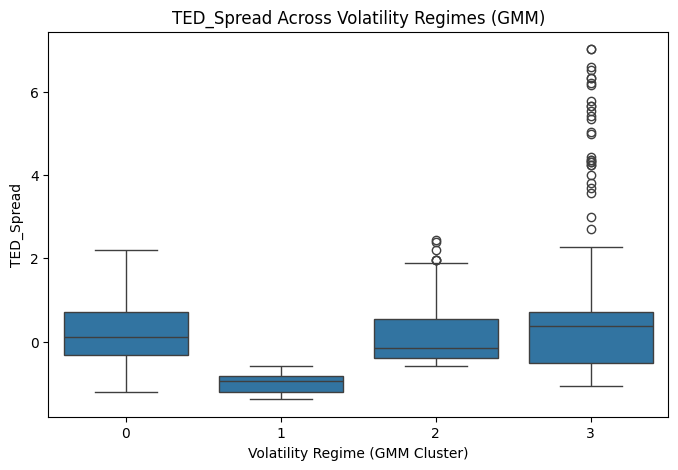

In [ ]:
# Select macroeconomic factors
macro_factors = ["Interest_Rate", "Inflation", "GDP_Growth", "Unemployment_Rate", "Money_Supply", "TED_Spread"]

# Create boxplots to compare clusters
for factor in macro_factors:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df["GMM_Cluster"], y=df[factor])
    plt.title(f"{factor} Across Volatility Regimes (GMM)")
    plt.xlabel("Volatility Regime (GMM Cluster)")
    plt.ylabel(factor)
    plt.show()


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv(drive_path + "preprocessed_data.csv")

# Drop the Date column (DBSCAN works only on numerical data)
df.drop(columns=['Date'], inplace=True, errors='ignore')

# Show dataset structure
print("\n Data Overview:")
print(df.info())
print("\n Sample Data:")
print(df.head())



 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VIX                    1985 non-null   float64
 1   S&P500                 1985 non-null   float64
 2   Historical_Volatility  1985 non-null   float64
 3   Interest_Rate          1985 non-null   float64
 4   Inflation              1985 non-null   float64
 5   GDP_Growth             1985 non-null   float64
 6   Unemployment_Rate      1985 non-null   float64
 7   Money_Supply           1985 non-null   float64
 8   TED_Spread             1985 non-null   float64
dtypes: float64(9)
memory usage: 139.7 KB
None

 Sample Data:
        VIX    S&P500  Historical_Volatility  Interest_Rate  Inflation  \
0 -0.581258 -1.147302              -0.447054      -0.818324  -1.121714   
1 -0.582587 -1.140281              -0.470647      -0.818324  -1.121714   
2 -0.545374 -1.143061

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Define DBSCAN parameters (adjust as needed)
eps_value = 1.5  # Distance threshold for clustering
min_samples_value = 5  # Minimum points to form a cluster

# Apply DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
df["DBSCAN_Cluster"] = dbscan.fit_predict(df)

# Save dataset with DBSCAN labels
df.to_csv(drive_path + "dbscan_clustered_data.csv", index=False)

# Check unique cluster labels
print("\n DBSCAN applied! Unique cluster labels:", df["DBSCAN_Cluster"].unique())



 DBSCAN applied! Unique cluster labels: [ 0 -1  1  2  3  4  5  6]


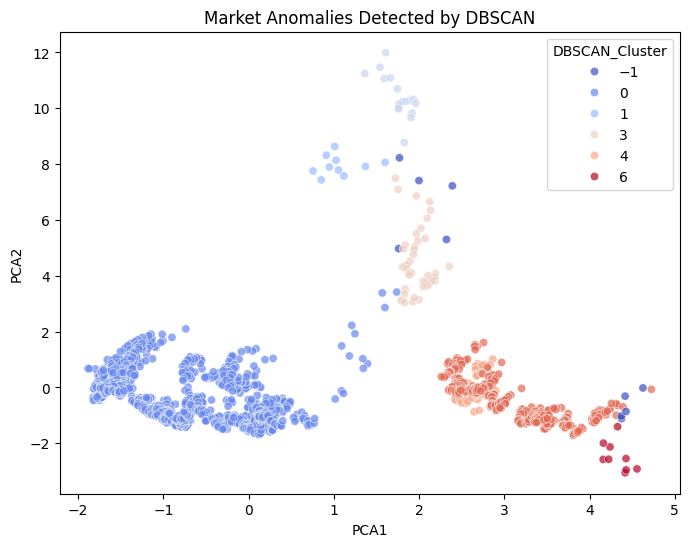

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=["DBSCAN_Cluster"], errors='ignore'))

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=["PCA1", "PCA2"])
df_pca["DBSCAN_Cluster"] = df["DBSCAN_Cluster"]

# Plot DBSCAN clusters (anomalies = -1)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="DBSCAN_Cluster", palette="coolwarm", data=df_pca, alpha=0.7)
plt.title("Market Anomalies Detected by DBSCAN")
plt.show()


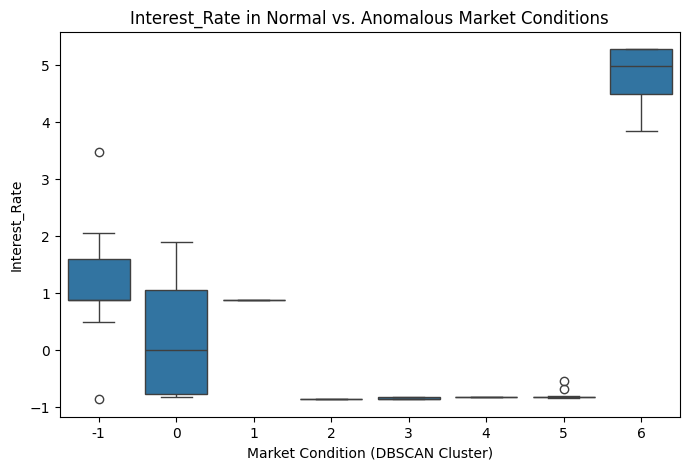

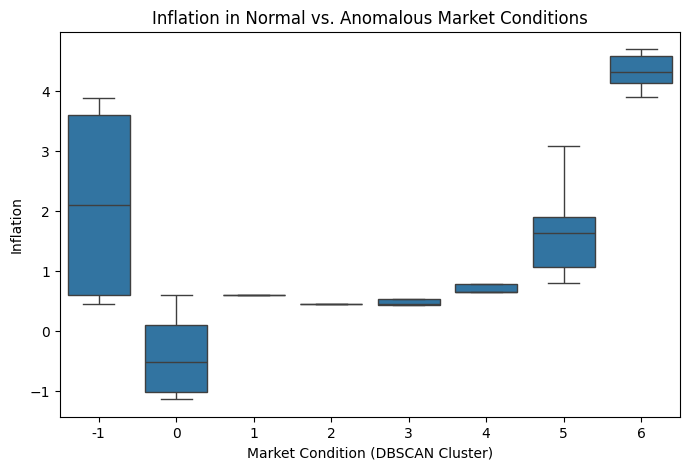

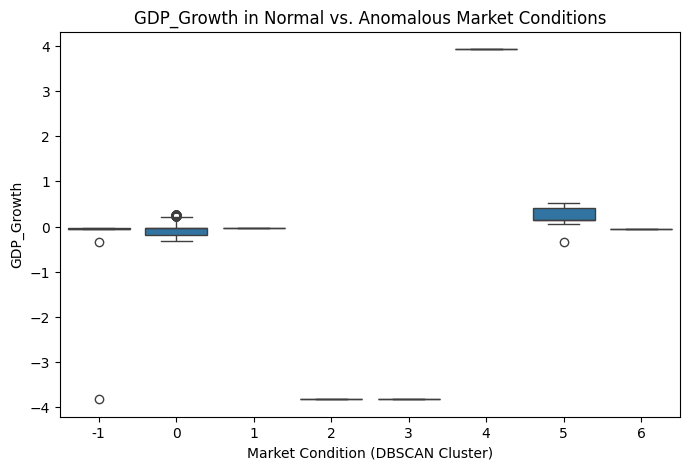

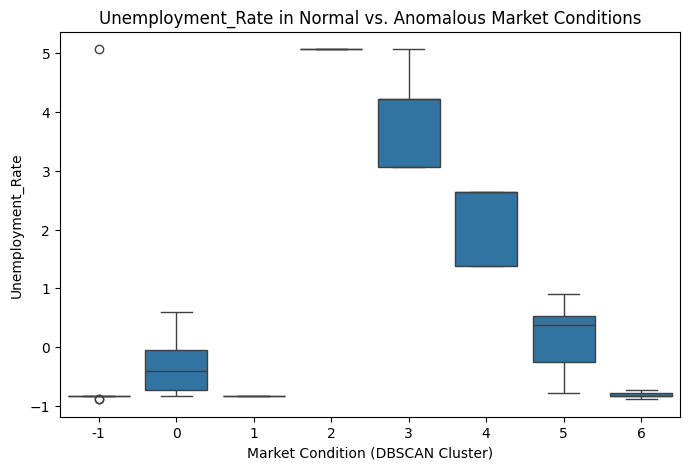

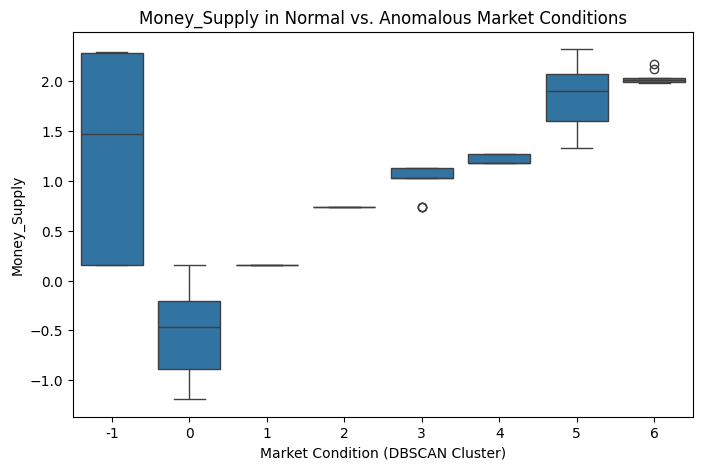

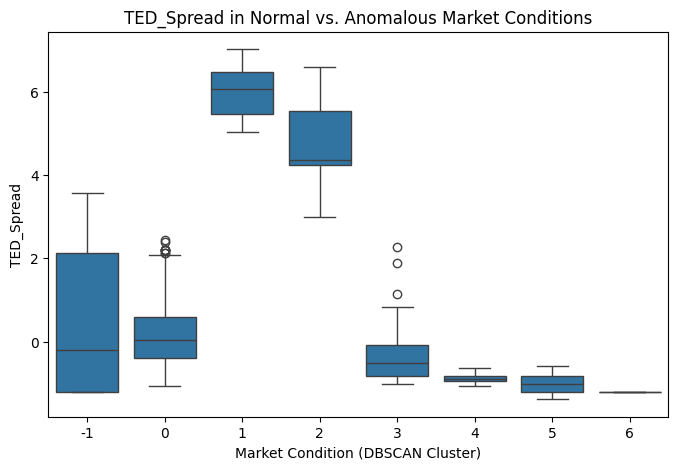

In [ ]:
# Select relevant macroeconomic factors
macro_factors = ["Interest_Rate", "Inflation", "GDP_Growth", "Unemployment_Rate", "Money_Supply", "TED_Spread"]

# Create boxplots for each macroeconomic factor
for factor in macro_factors:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df["DBSCAN_Cluster"], y=df[factor])
    plt.title(f"{factor} in Normal vs. Anomalous Market Conditions")
    plt.xlabel("Market Condition (DBSCAN Cluster)")
    plt.ylabel(factor)
    plt.show()


# Predicting Volatility Regimes Using Machine Learning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load DBSCAN-clustered dataset
df = pd.read_csv(drive_path + "dbscan_clustered_data_fixed.csv", parse_dates=["Date"])

# Define feature set (X) - selecting macroeconomic indicators
X = df[["Interest_Rate", "Inflation", "GDP_Growth", "Unemployment_Rate", "Money_Supply", "TED_Spread"]]

# Define target variable (y) - predicting volatility regime
y = df["DBSCAN_Cluster"]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data split: {X_train.shape[0]} training samples, {X_test.shape[0]} test samples")


Data split: 1588 training samples, 397 test samples


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
print("\n Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))



 Model Performance:
Accuracy: 0.9975

 Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.50      0.67         2
           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        58
           6       0.75      1.00      0.86         3

    accuracy                           1.00       397
   macro avg       0.97      0.94      0.94       397
weighted avg       1.00      1.00      1.00       397



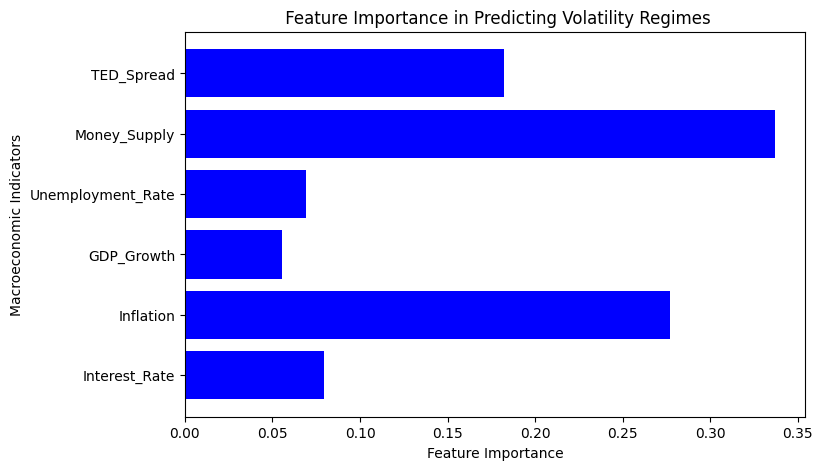

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color="blue")
plt.xlabel("Feature Importance")
plt.ylabel("Macroeconomic Indicators")
plt.title(" Feature Importance in Predicting Volatility Regimes")
plt.show()


In [ ]:
# Shift all labels up by 1 to make them non-negative
y_train_fixed = y_train + 1
y_test_fixed = y_test + 1

# Print unique values before and after
print("Original Unique Labels in y_train:", y_train.unique())
print("Fixed Unique Labels in y_train_fixed:", y_train_fixed.unique())


Original Unique Labels in y_train: [ 0  2  5  3  4  6 -1  1]
Fixed Unique Labels in y_train_fixed: [1 3 6 4 5 7 0 2]


In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, random_state=42)

# Train the model with fixed labels
xgb_model.fit(X_train, y_train_fixed)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report
print("\nXGBoost Model Performance:")
print(f"Accuracy: {accuracy_score(y_test_fixed, y_pred_xgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_fixed, y_pred_xgb))




XGBoost Model Performance:
Accuracy: 0.9975

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00       307
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00         3

    accuracy                           1.00       397
   macro avg       0.96      0.94      0.93       397
weighted avg       1.00      1.00      1.00       397



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Convert categorical labels into binary format
y_test_binarized = label_binarize(y_test_fixed, classes=list(set(y_train_fixed)))

# Compute AUC-ROC score
xgb_auc = roc_auc_score(y_test_binarized, xgb_model.predict_proba(X_test), multi_class="ovr")

print(f"AUC-ROC Score (XGBoost): {xgb_auc:.4f}")


AUC-ROC Score (XGBoost): 1.0000


In [ ]:
import joblib

# Save the trained XGBoost model
model_path = drive_path + "xgboost_volatility_model.pkl"
joblib.dump(xgb_model, model_path)

print(f"Model saved successfully at {model_path}!")


Model saved successfully at /content/drive/My Drive/Thesis/Data_Collection/xgboost_volatility_model.pkl!


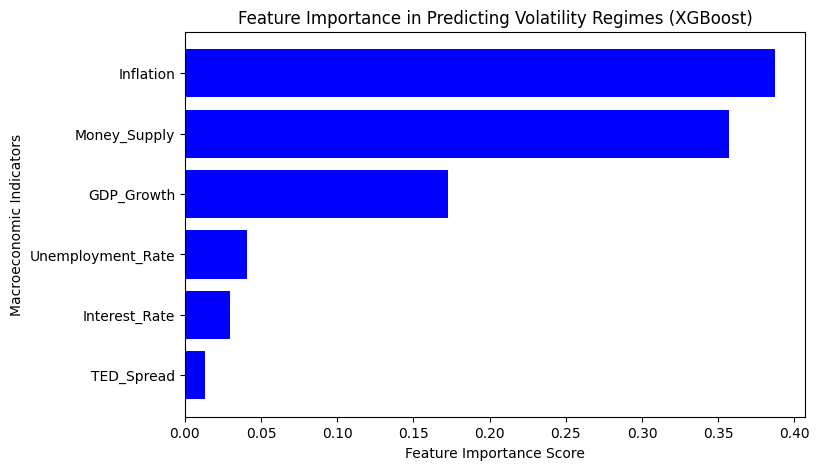

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance scores
importances = xgb_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx], color="blue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Macroeconomic Indicators")
plt.title("Feature Importance in Predicting Volatility Regimes (XGBoost)")
plt.show()


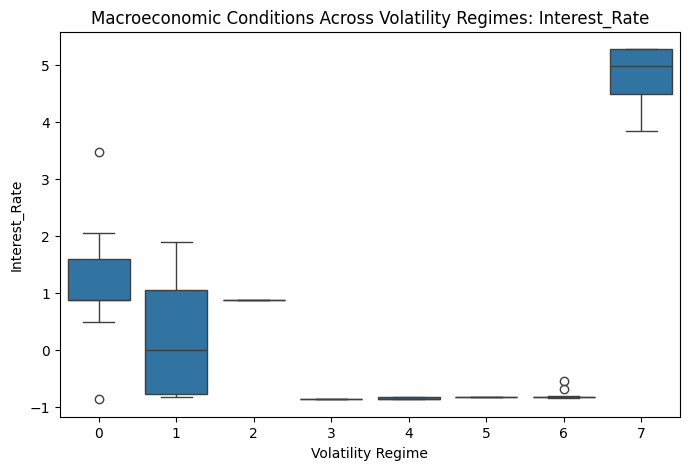

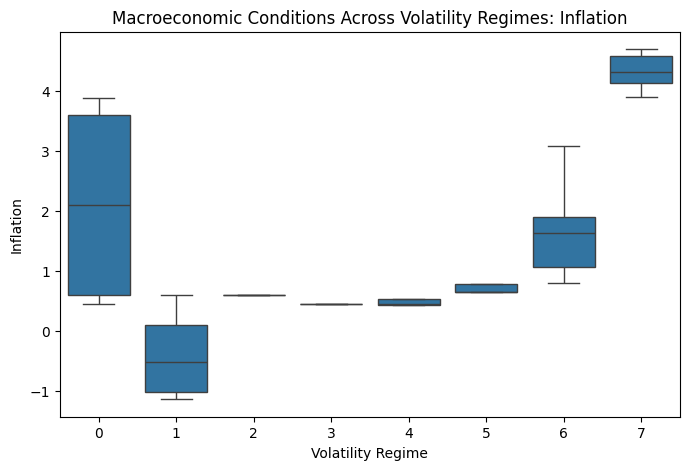

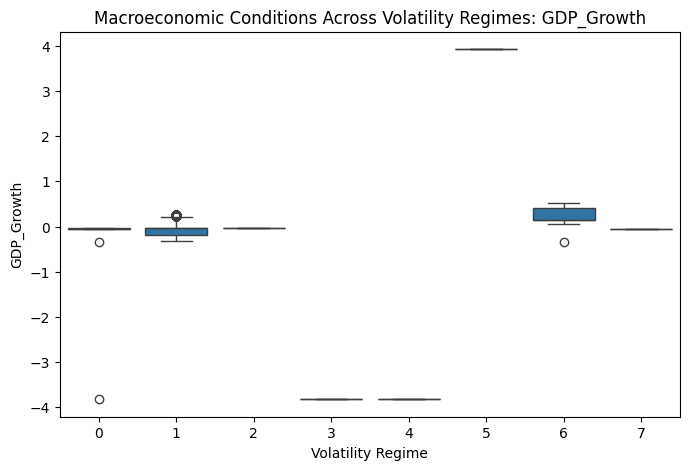

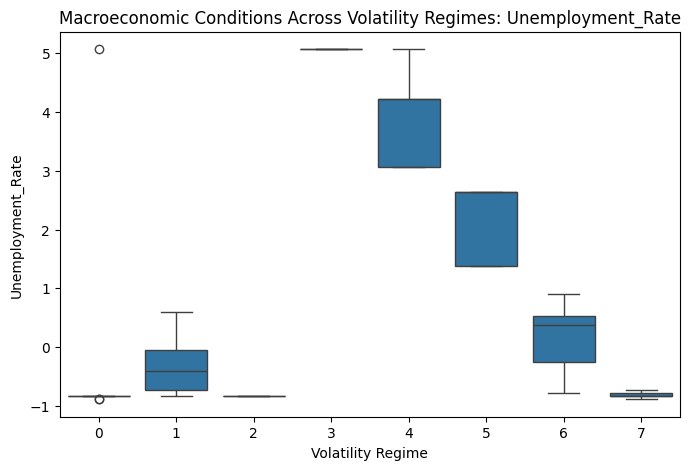

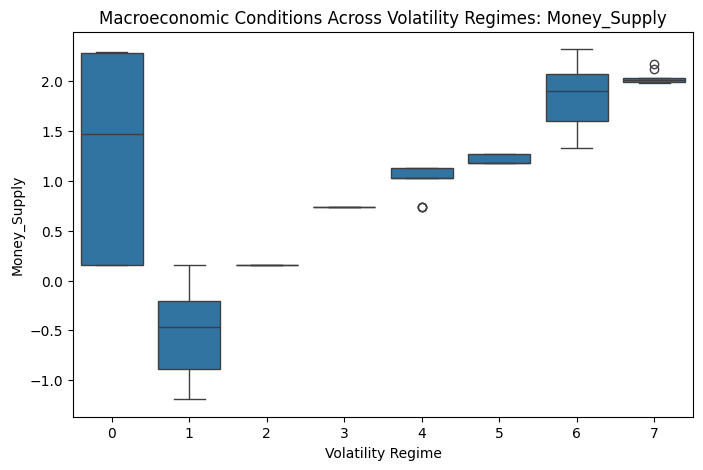

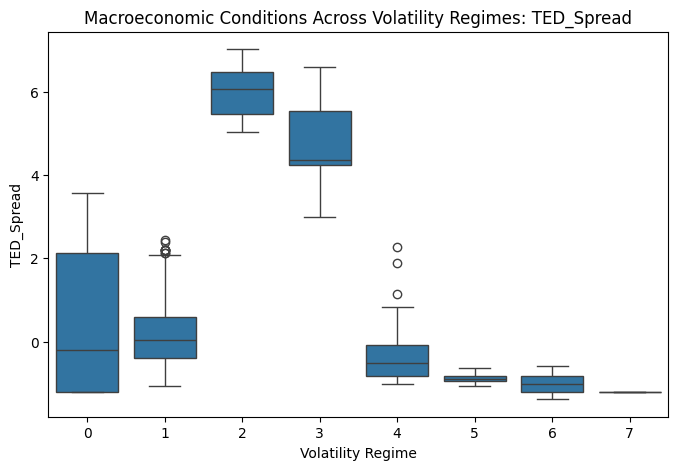

In [ ]:
import seaborn as sns

# Select key macro factors
macro_factors = ["Interest_Rate", "Inflation", "GDP_Growth", "Unemployment_Rate", "Money_Supply", "TED_Spread"]

# Convert DBSCAN cluster labels back to original scale for interpretation
df["Volatility_Regime"] = df["DBSCAN_Cluster"] + 1  # Shift labels back for interpretability

# Plot macroeconomic factor distributions across volatility regimes
for factor in macro_factors:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df["Volatility_Regime"], y=df[factor])
    plt.title(f"Macroeconomic Conditions Across Volatility Regimes: {factor}")
    plt.xlabel("Volatility Regime")
    plt.ylabel(factor)
    plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Define hypothetical macroeconomic scenarios
scenarios = pd.DataFrame({
    "Scenario": ["Rate Hike", "Recession", "Economic Boom"],
    "Interest_Rate": [X["Interest_Rate"].mean() + 1.5, X["Interest_Rate"].mean() - 1.0, X["Interest_Rate"].mean()],
    "Inflation": [X["Inflation"].mean(), X["Inflation"].mean() - 0.5, X["Inflation"].mean() + 0.3],
    "GDP_Growth": [X["GDP_Growth"].mean() - 1.0, X["GDP_Growth"].mean() - 2.0, X["GDP_Growth"].mean() + 1.5],
    "Unemployment_Rate": [X["Unemployment_Rate"].mean() + 0.5, X["Unemployment_Rate"].mean() + 2.0, X["Unemployment_Rate"].mean() - 1.0],
    "Money_Supply": [X["Money_Supply"].mean(), X["Money_Supply"].mean() - 0.5, X["Money_Supply"].mean() + 0.8],
    "TED_Spread": [X["TED_Spread"].mean() + 0.3, X["TED_Spread"].mean() + 0.7, X["TED_Spread"].mean() - 0.2]
})

# Display the hypothetical scenarios
from IPython.display import display

# Show the generated scenarios in Colab
display(scenarios)

,Scenario,Interest_Rate,Inflation,GDP_Growth,Unemployment_Rate,Money_Supply,TED_Spread
0,Rate Hike,1.5,-1.660916e-15,-1.0,0.5,5.154567e-16,0.3
1,Recession,-1.0,-5.000000e-01,-2.0,2.0,-5.000000e-01,0.7
2,Economic Boom,0.0,3.000000e-01,1.5,-1.0,8.000000e-01,-0.2


In [ ]:
import pandas as pd

# Define file path (assuming it's in Google Drive)
file_path = drive_path + "merged_data.csv"  # Ensure drive_path is set correctly

# Load the dataset
df_raw = pd.read_csv(file_path, parse_dates=["Date"])

# Display first few rows
print("\nFirst 5 Rows of Merged Data:")
print(df_raw.head())

# Show column names
print("\nColumn Names in Merged Data:")
print(df_raw.columns.tolist())

# Count missing values
missing_values = df_raw.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Drop columns with excessive missing data (threshold = 30% missing values)
df_cleaned = df_raw.dropna(thresh=len(df_raw) * 0.7, axis=1)

# Fill remaining missing values using forward fill and backward fill
df_cleaned = df_cleaned.fillna(method='ffill').fillna(method='bfill')

print("\nColumn Names in Dataset:")
print(df_cleaned.columns.tolist())






First 5 Rows of Merged Data:
        Date    VIX       S&P500  Historical_Volatility  Interest_Rate  \
0 2014-02-14  13.57  1838.630005               0.142034            NaN   
1 2014-02-18  13.87  1840.760010               0.142055            NaN   
2 2014-02-19  15.50  1828.750000               0.143194            NaN   
3 2014-02-20  14.79  1839.780029               0.143176            NaN   
4 2014-02-21  14.68  1836.250000               0.143291            NaN   

   Inflation  GDP_Growth  Unemployment_Rate  Money_Supply  TED_Spread  
0        NaN         NaN                NaN           NaN        0.22  
1        NaN         NaN                NaN           NaN        0.18  
2        NaN         NaN                NaN           NaN        0.17  
3        NaN         NaN                NaN           NaN        0.19  
4        NaN         NaN                NaN           NaN        0.18  

Column Names in Merged Data:
['Date', 'VIX', 'S&P500', 'Historical_Volatility', 'Interest_Ra

<ipython-input-167-2c52e3740ff8>:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df_cleaned.fillna(method='ffill').fillna(method='bfill')


In [ ]:
# Define paths to macroeconomic files (replace with actual filenames)
macro_files = ["Interest_Rate.csv", "Inflation.csv", "Money_Supply.csv", "Unemployment_Rate.csv", "GDP_Growth.csv"]  # Update with correct names

# Load and inspect each file
for file in macro_files:
    df_macro = pd.read_csv(drive_path + file, parse_dates=["Date"])
    print(f"\nFirst 5 Rows of {file}:")
    print(df_macro.head())

    print("\nColumn Names:")
    print(df_macro.columns.tolist())


First 5 Rows of Interest_Rate.csv:
        Date  Interest_Rate
0 1954-07-01           0.80
1 1954-08-01           1.22
2 1954-09-01           1.07
3 1954-10-01           0.85
4 1954-11-01           0.83

Column Names:
['Date', 'Interest_Rate']

First 5 Rows of Inflation.csv:
        Date  Inflation
0 1947-01-01      21.48
1 1947-02-01      21.62
2 1947-03-01      22.00
3 1947-04-01      22.00
4 1947-05-01      21.95

Column Names:
['Date', 'Inflation']

First 5 Rows of Money_Supply.csv:
        Date  Money_Supply
0 1959-01-01         286.6
1 1959-02-01         287.7
2 1959-03-01         289.2
3 1959-04-01         290.1
4 1959-05-01         292.2

Column Names:
['Date', 'Money_Supply']

First 5 Rows of Unemployment_Rate.csv:
        Date  Unemployment_Rate
0 1948-01-01                3.4
1 1948-02-01                3.8
2 1948-03-01                4.0
3 1948-04-01                3.9
4 1948-05-01                3.5

Column Names:
['Date', 'Unemployment_Rate']

First 5 Rows of GDP_Growth.

In [ ]:
# Load merged_data.csv (market data)
df_market = pd.read_csv(drive_path + "merged_data.csv", parse_dates=["Date"])

# Merge all macroeconomic files
for file in macro_files:
    df_macro = pd.read_csv(drive_path + file, parse_dates=["Date"])
    df_market = df_market.merge(df_macro, on="Date", how="left")

# Display merged dataset
print("\nFirst 5 Rows of Updated Merged Data:")
print(df_market.head())

# Save the new merged dataset
df_market.to_csv(drive_path + "merged_data_updated.csv", index=False)

print("Updated merged dataset saved as merged_data_updated.csv")



First 5 Rows of Updated Merged Data:
        Date    VIX       S&P500  Historical_Volatility  Interest_Rate_x  \
0 2014-02-14  13.57  1838.630005               0.142034              NaN   
1 2014-02-18  13.87  1840.760010               0.142055              NaN   
2 2014-02-19  15.50  1828.750000               0.143194              NaN   
3 2014-02-20  14.79  1839.780029               0.143176              NaN   
4 2014-02-21  14.68  1836.250000               0.143291              NaN   

   Inflation_x  GDP_Growth_x  Unemployment_Rate_x  Money_Supply_x  TED_Spread  \
0          NaN           NaN                  NaN             NaN        0.22   
1          NaN           NaN                  NaN             NaN        0.18   
2          NaN           NaN                  NaN             NaN        0.17   
3          NaN           NaN                  NaN             NaN        0.19   
4          NaN           NaN                  NaN             NaN        0.18   

   Interest_Rate_y

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant numerical features for normalization
features = ["VIX", "S&P500", "Historical_Volatility", "Interest_Rate",
            "Inflation", "GDP_Growth", "Unemployment_Rate", "Money_Supply", "TED_Spread"]

scaler = StandardScaler()
df_cleaned[features] = scaler.fit_transform(df_cleaned[features])

# Confirm data normalization
print("\nSummary Statistics After Normalization:")
print(df_cleaned[features].describe())


KeyError: "['Interest_Rate', 'Inflation', 'GDP_Growth', 'Unemployment_Rate', 'Money_Supply'] not in index"

In [ ]:
from sklearn.preprocessing import StandardScaler

# Ensure only valid features are selected
valid_features = [col for col in ["VIX", "S&P500", "Historical_Volatility",
                                  "Interest_Rate", "Inflation", "GDP_Growth",
                                  "Unemployment_Rate", "Money_Supply", "TED_Spread"]
                  if col in df_cleaned.columns]

scaler = StandardScaler()
df_cleaned[valid_features] = scaler.fit_transform(df_cleaned[valid_features])

print("\nSummary Statistics After Normalization:")
print(df_cleaned[valid_features].describe())




Summary Statistics After Normalization:
                VIX        S&P500  Historical_Volatility    TED_Spread
count  2.016000e+03  2.016000e+03           2.016000e+03  2.016000e+03
mean   2.819614e-17  5.639228e-17          -2.819614e-17 -2.819614e-17
std    1.000248e+00  1.000248e+00           1.000248e+00  1.000248e+00
min   -1.109054e+00 -1.216646e+00          -1.035732e+00 -1.381146e+00
25%   -6.154074e-01 -8.523722e-01          -5.322768e-01 -6.357599e-01
50%   -2.695875e-01 -1.532715e-01          -2.363987e-01 -2.009511e-01
75%    3.243934e-01  4.246205e-01           2.484003e-01  4.823197e-01
max    8.730426e+00  2.661711e+00           6.975956e+00  7.066566e+00


In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust parameters if needed
df_cleaned["DBSCAN_Cluster"] = dbscan.fit_predict(df_cleaned[valid_features])

# Display unique cluster labels (-1 represents anomalies)
print("\nUnique DBSCAN Clusters:", df_cleaned["DBSCAN_Cluster"].unique())

# Count anomalies
anomalies = df_cleaned[df_cleaned["DBSCAN_Cluster"] == -1]
print(f"\nTotal Market Anomalies Detected: {len(anomalies)}")



Unique DBSCAN Clusters: [ 0 -1  1]

Total Market Anomalies Detected: 5


In [ ]:
# Save the clustered dataset
output_path = drive_path + "dbscan_clustered_data.csv"
df_cleaned.to_csv(output_path, index=False)

print(f"DBSCAN results saved at {output_path}")


DBSCAN results saved at /content/drive/My Drive/Thesis/Data_Collection/dbscan_clustered_data.csv


In [ ]:
# Count occurrences of each cluster
cluster_counts = df_cleaned["DBSCAN_Cluster"].value_counts()
print("\nVolatility Regime Distribution:")
print(cluster_counts)



Volatility Regime Distribution:
DBSCAN_Cluster
 0    1984
 1      27
-1       5
Name: count, dtype: int64


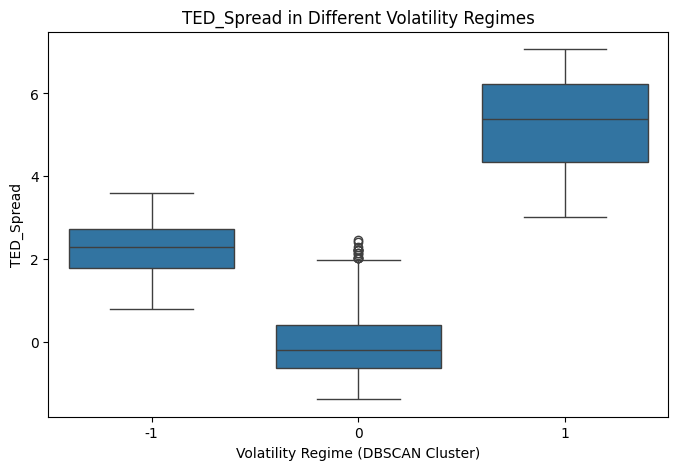

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dynamically select available macroeconomic factors
available_factors = [col for col in ["Interest_Rate", "Inflation", "GDP_Growth",
                                     "Unemployment_Rate", "Money_Supply", "TED_Spread"]
                     if col in df_cleaned.columns]

# Compare macroeconomic conditions across DBSCAN clusters
for factor in available_factors:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_cleaned["DBSCAN_Cluster"], y=df_cleaned[factor])
    plt.title(f"{factor} in Different Volatility Regimes")
    plt.xlabel("Volatility Regime (DBSCAN Cluster)")
    plt.ylabel(factor)
    plt.show()



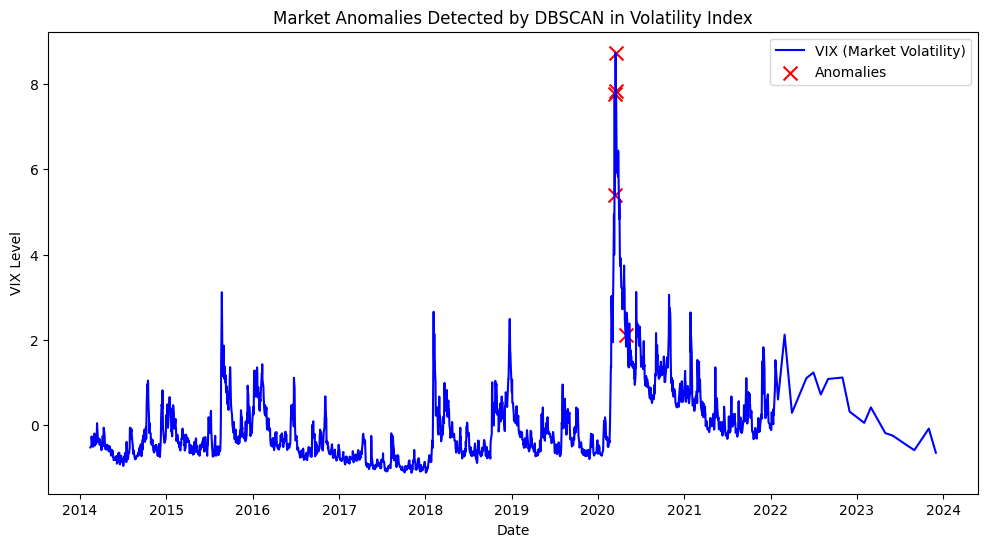

In [ ]:
# Sort data by date
df_cleaned.sort_values("Date", inplace=True)

# Plot anomalies in VIX (volatility index)
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned["Date"], df_cleaned["VIX"], label="VIX (Market Volatility)", color="blue")

# Highlight anomalies
plt.scatter(df_cleaned[df_cleaned["DBSCAN_Cluster"] == -1]["Date"],
            df_cleaned[df_cleaned["DBSCAN_Cluster"] == -1]["VIX"],
            color="red", label="Anomalies", marker="x", s=100)

plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.title("Market Anomalies Detected by DBSCAN in Volatility Index")
plt.legend()
plt.show()
